In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import requests # library to handle requests


In [2]:
import wget

### Beautiful soup: getting neighborhood data from Wikipedia

In [3]:
from bs4 import BeautifulSoup
import requests

In [4]:
url='https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Calgary'
wget.download(url,'C:/Users/arman/OneDrive/Desktop/capstone/Calgaryneigh.html')

100% [............................................................................] 316067 / 316067

'C:/Users/arman/OneDrive/Desktop/capstone/Calgaryneigh (1).html'

In [5]:
with open ('Calgaryneigh.html', encoding="utf8") as Chtml:
    Csoup=BeautifulSoup(Chtml, 'lxml')

In [6]:
table=Csoup.find('table')

In [7]:
table=Csoup.tbody
len(table)

518

In [8]:
rows=Csoup.table.tbody.find_all('tr')

In [9]:
data=[]
master=[]
for row in rows:
    for j in row.find_all('td'):
        data.append(j.text)
    master.append(data)
    data=[]
for row in master:
    for i,s in enumerate(row):
        row[i]=s.strip()

In [10]:
df=pd.DataFrame(master)
df.drop(0, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.columns=['Name', 'Quadrant', 'Sector', 'Ward', 'Type', 'Population rank', 'Population_2012'
           ,'population_2011', '% change', 'Dwelings', 'Area', 'Population_Density']


,Name,Quadrant,Sector,Ward,Type,Population rank,Population_2012,population_2011,% change,Dwelings,Area,Population_Density
0,Abbeydale,NE/SE,Northeast,10,Residential,82,"5,917","5,700",3.8,"2,023",1.7,"3,480.6"
1,Acadia,SE,South,9,Residential,27,"10,705","10,615",0.8,"5,053",3.9,"2,744.9"
2,Albert Park/Radisson Heights,SE,East,10,Residential,75,"6,234","6,217",0.3,"2,709",2.5,"2,493.6"
3,Altadore,SW,Centre,11,Residential,39,"9,116","8,907",2.3,"4,486",2.9,"3,143.4"
4,Alyth/Bonnybrook,SE,Centre,9,Industrial,208,16,17,−5.9,14,3.8,4.2


### Cleaning the data

In [ ]:
import re
newcol=[]
for i,s in enumerate (df['Name']):
       
    regex = re.compile('/')
    a=str(s)
    if regex.search(a) != None: 
        split_string=a.split('/',1)
        update=split_string[0]
        df.iloc[i,0]=update

In [11]:
df.replace(',','',regex=True, inplace=True)
df.drop(257, inplace=True)
df=df.fillna(0)
df.head()

,Name,Quadrant,Sector,Ward,Type,Population rank,Population_2012,population_2011,% change,Dwelings,Area,Population_Density
0,Abbeydale,NE/SE,Northeast,10,Residential,82,5917,5700,3.8,2023,1.7,3480.6
1,Acadia,SE,South,9,Residential,27,10705,10615,0.8,5053,3.9,2744.9
2,Albert Park/Radisson Heights,SE,East,10,Residential,75,6234,6217,0.3,2709,2.5,2493.6
3,Altadore,SW,Centre,11,Residential,39,9116,8907,2.3,4486,2.9,3143.4
4,Alyth/Bonnybrook,SE,Centre,9,Industrial,208,16,17,−5.9,14,3.8,4.2


### Extracting Long and Lat using geocoder

In [ ]:
List=np.array(df.Name+', Calgary, AB')

In [15]:
import geocoder
from geopy.geocoders import Nominatim

In [ ]:
def get_longlat(List, a,b):
    count=[]
    long=[]
    for neigh in range(a,b):
        geolocator = Nominatim()
        location = geolocator.geocode(List[neigh])
        try:
            long.append([location.latitude, location.longitude])
        except:
            long.append([0,0])
            
    return(long)

----tried to get the location information for the complete list and got error, therefor divided the list to 20 to 30 batches to get the data

In [ ]:
a=get_longlat(List,0,20)

In [ ]:
b=get_longlat(List,20,40)

In [ ]:
c=get_longlat(List,40,60)
d=a+b+c

In [ ]:
e=get_longlat(List,60,80)

In [ ]:
f=get_longlat(List,80,110)

In [ ]:
g=get_longlat(List,110,140)

In [ ]:
h=get_longlat(List,140,170)

In [ ]:
i=get_longlat(List,170,200)

In [ ]:
j=get_longlat(List,200,230)

In [ ]:
k=get_longlat(List,230,257)
listlonglat=d+e+f+g+h+i+j+k
long=[]
lat=[]
for i in listlonglat:
    long.append(i[0])
    lat.append(i[1])

In [ ]:
dfl=pd.DataFrame(lat,long)
dfl.reset_index(inplace=True)
dfl.columns=('Long', 'Lat')

In [ ]:
df1.head()

In [ ]:
df2=pd.concat([df,dfl], axis=1)
df2.iloc[101,13]=-114.0501
df2[(df2['Long']==0) ]
indexnames=df2[(df2['Long']==0)].index
df3=df2.drop(indexnames)
df3.reset_index(drop=True, inplace=True)

In [ ]:
df5=df3
df5.to_csv('C:/Users/arman/jupyter/capstone/Calgary.csv', index=False)

In [12]:
dfcalgary=pd.read_csv('C:/Users/arman/jupyter/capstone/Calgary.csv')


In [ ]:
indexxx=dfcalgary[dfcalgary['Population_2012']==0].index
dfcalgary.drop(indexxx, inplace=True)
dfcalgary.to_csv('C:/Users/arman/jupyter/capstone/Calgaryupdated.csv', index=False)

In [21]:
dfcalgary=pd.read_csv('Calgaryupdated.csv')

In [13]:
import folium 

In [16]:
address = 'Calgary, Alberta'

geolocator = Nominatim(user_agent="Calgary_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 51.0534234, -114.0625892.


In [22]:
map_Calgary = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, name in zip(dfcalgary['Lat'], dfcalgary['Long'], dfcalgary['Name']):
    
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lng, lat],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Calgary)  
    
map_Calgary

### Getting Venue information from FourSquare

In [18]:
from pandas.io.json import json_normalize 

In [ ]:
CLIENT_ID = 'IEJOZALHDQVL2XGQGWYTT3VV4S2FNZ4T4T104DJTIWLQXEOS' # your Foursquare ID
CLIENT_SECRET = 'OZ5RY3HTSR2XGFMIG1WUDMCHQUKB5VRDARO4WBJLJQ2BWFYT' # your Foursquare Secret
VERSION = '20190907' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [ ]:
def get_venues(name, lattitude, longitude, Radius, Limit):
    venues_list=[]
    for name, lat, lng in zip(name, lattitude, longitude):
        
        print(name)
         # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            Radius, 
            Limit)
        
        # make the GET request
        results=requests.get(url).json()['response']['groups'][0]['items']
        print(results)
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                      'Neighborhood Latitude', 
                      'Neighborhood Longitude', 
                      'Venue', 
                      'Venue Latitude', 
                      'Venue Longitude', 
                      'Venue Category']
        
    
    return(nearby_venues)

In [ ]:
 url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            51.0588, 
            -113.9294, 
            radius, 
            limit)

In [ ]:
results=requests.get(url).json()["response"]['groups'][0]['items']

In [ ]:
radius=500
limit=100

In [ ]:
CVenues=get_venues(dfcalgary['Name'], dfcalgary['Lat'],
                   dfcalgary['Long'], radius, limit )

In [23]:
CVenues=pd.read_csv('CVenues.csv')


### Preparing Data for K-Means Clustering

In [24]:
CVresturant=CVenues[CVenues['Venue Category'].str.contains('Restaurant') | 
                   CVenues['Venue Category'].str.contains('Pizza') |
                   CVenues['Venue Category'].str.contains('Bar') |
                   CVenues['Venue Category'].str.contains('Breakfast') |
                   CVenues['Venue Category'].str.contains('Wings') |
                   CVenues['Venue Category'].str.contains('Pub')|
                   CVenues['Venue Category'].str.contains('BBQ')]

In [25]:
CVuniq=CVresturant.drop_duplicates(['Neighborhood'])
CVuniq.reset_index(drop=True, inplace=True)
CVresturant=CVresturant.drop(CVresturant[CVresturant['Venue Category']=='Salon / Barbershop'].index)
CVresturant.reset_index(drop=True, inplace=True)

In [28]:
CVonehot=pd.get_dummies(CVresturant[['Venue Category']], prefix='', prefix_sep='')
CVonehot.insert(loc=0, column='Neighborhood', value=CVresturant['Neighborhood'])
CVgrouped=CVonehot.groupby('Neighborhood').mean().reset_index()
CVgrouped_clustering = CVgrouped.drop('Neighborhood', axis=1)

In [134]:
CVgrouped_clustering

,American Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bar,Brazilian Restaurant,Breakfast Spot,Cajun / Creole Restaurant,Chinese Restaurant,Cocktail Bar,...,Seafood Restaurant,Southern / Soul Food Restaurant,Sports Bar,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint
0,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.5
1,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,0.142857,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
3,0.000000,0.0,0.0,0.25,0.0,0.0,0.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0
4,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
95,0.000000,0.0,0.0,0.00,0.0,0.0,0.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.00,0.0,0.0
96,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
97,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


In [30]:
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans

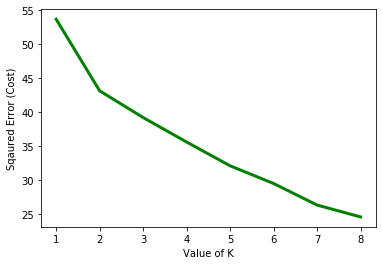

In [31]:
cost =[] 
for i in range(1, 9): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(CVgrouped_clustering) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 9), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

In [32]:
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(CVgrouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 3, 0, 1, 0, 2, 0, 2, 3, 0])

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = CVgrouped['Neighborhood']

for ind in np.arange(CVgrouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(CVgrouped.iloc[ind, :], num_top_venues)


In [36]:
neighborhoods_venues_sorted.insert(1, 'Cluster Labels', kmeans.labels_)

In [39]:
neighborhoods_venues_sorted.insert(2, 'Neighborhood Lat', value=CVuniq['Neighborhood Latitude'])
neighborhoods_venues_sorted.insert(3, 'Neighborhood Lng', value=CVuniq['Neighborhood Longitude'])

In [41]:
CVfinal=neighborhoods_venues_sorted

In [44]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [45]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(CVfinal['Neighborhood Lat'], CVfinal['Neighborhood Lng'], CVfinal['Neighborhood'], CVfinal['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [113]:
CVcluster0=CVfinal.loc[CVfinal['Cluster Labels'] == 0, CVfinal.columns[[0] + list(range(4, CVfinal.shape[1]))]]
CVcluster0.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbeydale,Wings Joint,Chinese Restaurant,Falafel Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar
1,Altadore,Greek Restaurant,Wings Joint,Falafel Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Gluten-free Restaurant,Gay Bar,French Restaurant
2,Aspen Woods,Restaurant,Japanese Restaurant,Juice Bar,Mexican Restaurant,Pizza Place,American Restaurant,Sushi Restaurant,Hotel Bar,Hong Kong Restaurant,Greek Restaurant
3,Banff Trail,Pizza Place,Vietnamese Restaurant,BBQ Joint,Breakfast Spot,Wings Joint,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant
5,Beltline,Pub,Bar,Restaurant,Vietnamese Restaurant,French Restaurant,Cocktail Bar,Pizza Place,Breakfast Spot,Korean Restaurant,Latin American Restaurant
6,Bonavista Downs,Chinese Restaurant,Wings Joint,Falafel Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar
8,Bridgeland,Pizza Place,Italian Restaurant,Sushi Restaurant,Breakfast Spot,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant
10,CFB Lincoln Park PMQ,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Greek Restaurant,Korean Restaurant,Fast Food Restaurant,Mexican Restaurant,Pub,Restaurant,Pizza Place
12,Cedarbrae,Vietnamese Restaurant,Bar,Wings Joint,Falafel Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant
14,Chinatown,American Restaurant,Vietnamese Restaurant,Brazilian Restaurant,Breakfast Spot,Restaurant,Falafel Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant


In [66]:
CVcluster1=CVfinal.loc[CVfinal['Cluster Labels'] == 1, CVfinal.columns[[0] + list(range(4, CVfinal.shape[1]))]]
CVcluster1.head(40)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Bankview,Pizza Place,Wings Joint,Italian Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar
7,Brentwood,Pizza Place,Wings Joint,Italian Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar
13,Chaparral,Sushi Restaurant,Pizza Place,Wings Joint,Falafel Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar
25,Douglasdale,Pizza Place,Wings Joint,Italian Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar
39,Glendale,Pizza Place,Wings Joint,Italian Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar
41,Hawkwood,Chinese Restaurant,Pizza Place,Wings Joint,Fast Food Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant
51,Lake Bonavista,Restaurant,Pizza Place,Wings Joint,Falafel Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar
60,Millrise,Pizza Place,Wings Joint,Italian Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar
69,Pump Hill,Pizza Place,Wings Joint,Italian Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar
72,Ranchlands,Pizza Place,Wings Joint,Italian Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar


In [59]:
CVcluster2=CVfinal.loc[CVfinal['Cluster Labels'] == 2, CVfinal.columns[[0] + list(range(4, CVfinal.shape[1]))]]
CVcluster2.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Britannia,Restaurant,Wings Joint,Falafel Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar
15,Chinook Park,Pub,Italian Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar,French Restaurant
17,Collingwood,Pub,Italian Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar,French Restaurant
29,Eagle Ridge,Restaurant,Wings Joint,Falafel Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar
52,Lincoln Park,Restaurant,Wings Joint,Falafel Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar
54,MacEwan Glen,Pub,Sports Bar,Eastern European Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar,French Restaurant
55,Manchester,Pub,Bar,Restaurant,Eastern European Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar
57,Mayland Heights,Pub,Vietnamese Restaurant,Eastern European Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar,French Restaurant
67,Parkland,Pub,Fast Food Restaurant,Italian Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar
84,Spruce Cliff,Pub,Italian Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar,French Restaurant


In [60]:
CVcluster3=CVfinal.loc[CVfinal['Cluster Labels'] == 3, CVfinal.columns[[0] + list(range(4, CVfinal.shape[1]))]]
CVcluster3

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Cambrian Heights,Indian Restaurant,Falafel Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar,French Restaurant
18,Coral Springs,Indian Restaurant,Falafel Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar,French Restaurant
24,Discovery Ridge,Indian Restaurant,Falafel Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar,French Restaurant
77,Roxboro,Indian Restaurant,Bar,Falafel Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar


In [61]:
CVcluster4=CVfinal.loc[CVfinal['Cluster Labels'] == 4, CVfinal.columns[[0] + list(range(4, CVfinal.shape[1]))]]
CVcluster4

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,Falconridge,Fast Food Restaurant,Wings Joint,Falafel Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar
37,Forest Lawn,Fast Food Restaurant,Wings Joint,Falafel Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar
42,Hidden Valley,Fast Food Restaurant,Wings Joint,Falafel Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar
43,Highland Park,Fast Food Restaurant,Wings Joint,Falafel Restaurant,Hotpot Restaurant,Hotel Bar,Hookah Bar,Hong Kong Restaurant,Greek Restaurant,Gluten-free Restaurant,Gay Bar


### Clustering neigborhoods based on their venue count and population density

In [64]:
import pandasql as psql

In [79]:
Calgarypop=pd.read_csv('Calgaryupdated.csv')

In [92]:
Cvenuecount=CVresturant.groupby('Neighborhood').count()

In [94]:
Neigborcluster=psql.sqldf('select  cp.Population_2012, cp.Dwelings, cp.Area, cv.Venue as Venue_count from Calgarypop cp join Cvenuecount cv on cp.Name=cv.Neighborhood;')

In [119]:
Neigborcluster.drop(['Dwelings'], axis=1, inplace=True)

In [135]:
Neigborcluster

,Population_2012,Area,Venue_count
0,5917,1.7,2
1,9116,2.9,1
2,5271,3.8,7
3,3837,1.5,4
4,5221,0.7,2
...,...,...,...
95,5802,2.4,2
96,8228,4.1,2
97,11852,2.6,1
98,4126,1.3,1


In [140]:
 from sklearn import preprocessing

In [142]:
x = Neigborcluster.values #returns a numpy array

In [144]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_new = pd.DataFrame(x_scaled)

In [145]:
x_new

,0,1,2
0,0.285766,0.223881,0.029412
1,0.451767,0.402985,0.000000
2,0.252244,0.537313,0.176471
3,0.177832,0.194030,0.088235
4,0.249650,0.074627,0.029412
...,...,...,...
95,0.279799,0.328358,0.029412
96,0.405687,0.582090,0.029412
97,0.593742,0.358209,0.000000
98,0.192829,0.164179,0.000000


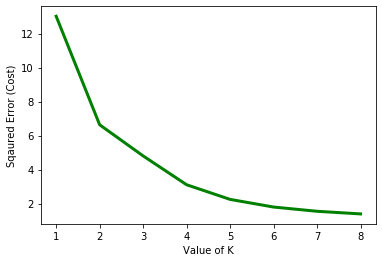

In [146]:
cost =[] 
for i in range(1, 9): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(x_new) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 9), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

In [147]:
Kclusters=4
kmeans=KMeans(n_clusters=Kclusters, random_state=0).fit(x_new)

In [148]:
cluster_labels=kmeans.labels_[:]

In [149]:
Neigborfinal=psql.sqldf('select  cn.Name, cn.Population_2012, cn.Dwelings, cn.Area, cv.Venue as Venue_count,cn.Long, cn.Lat  from CNeighb cn join Cvenuecount cv on cn.Name=cv.Neighborhood;')

In [150]:
Neigborfinal.insert(2, 'Labels',cluster_labels )

In [151]:
Neigborfinal.head()

,Name,Population_2012,Labels,Dwelings,Area,Venue_count,Long,Lat
0,Abbeydale,5917,2,2023,1.7,2,51.058836,-113.929413
1,Altadore,9116,2,4486,2.9,1,51.015104,-114.100756
2,Aspen Woods,5271,2,2281,3.8,7,51.043119,-114.210185
3,Banff Trail,3837,0,1950,1.5,4,51.071462,-114.111647
4,Bankview,5221,0,3528,0.7,2,51.033887,-114.099518


In [152]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(Kclusters)
ys = [i + x + (i*x)**2 for i in range(Kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Neigborfinal['Long'], Neigborfinal['Lat'], Neigborfinal['Name'], Neigborfinal['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [153]:
Cluster0=Neigborfinal.loc[Neigborfinal['Labels'] == 0]

In [154]:
Cluster0

,Name,Population_2012,Labels,Dwelings,Area,Venue_count,Long,Lat
3,Banff Trail,3837,0,1950,1.5,4,51.071462,-114.111647
4,Bankview,5221,0,3528,0.7,2,51.033887,-114.099518
6,Bonavista Downs,925,0,370,0.5,1,50.944656,-114.030550
9,Britannia,803,0,309,0.5,1,51.012540,-114.083447
10,Cambrian Heights,2059,0,930,0.9,1,51.087196,-114.088976
12,CFB Lincoln Park PMQ,1973,0,729,0.4,14,51.002400,-114.072400
14,Chinatown,1577,0,1381,0.2,5,51.050654,-114.062611
15,Chinook Park,1707,0,589,0.6,1,50.983123,-114.089301
17,Collingwood,2222,0,978,1.6,1,51.083764,-114.101815
20,Country Hills,3728,0,1426,1.9,3,51.143001,-114.078536


In [155]:
Cluster1=Neigborfinal.loc[Neigborfinal['Labels'] == 1]

In [156]:
Cluster1

,Name,Population_2012,Labels,Dwelings,Area,Venue_count,Long,Lat
13,Chaparral,11552,1,3759,5.4,2,50.883594,-114.021265
25,Douglasdale,11890,1,4217,6.4,1,50.934510,-113.987135
31,Edgemont,15898,1,5421,6.6,1,51.128623,-114.142711
42,Hidden Valley,11799,1,3867,4.3,1,51.151085,-114.112672
51,Lake Bonavista,10475,1,4106,5.2,2,50.939987,-114.051475
58,McKenzie Towne,16102,1,6783,4.8,4,50.916499,-113.964353
79,Saddle Ridge,14372,1,3668,5.5,1,51.129706,-113.944796
87,Taradale,16841,1,4559,2.9,1,51.116704,-113.938464
89,Tuscany,19013,1,6492,6.9,1,51.125380,-114.244843
93,Varsity,12200,1,5547,6.8,2,51.090998,-114.155759


In [157]:
Cluster2=Neigborfinal.loc[Neigborfinal['Labels'] == 2]

In [158]:
Cluster2

,Name,Population_2012,Labels,Dwelings,Area,Venue_count,Long,Lat
0,Abbeydale,5917,2,2023,1.7,2,51.058836,-113.929413
1,Altadore,9116,2,4486,2.9,1,51.015104,-114.100756
2,Aspen Woods,5271,2,2281,3.8,7,51.043119,-114.210185
7,Brentwood,6059,2,2595,2.9,1,51.093075,-114.126051
8,Bridgeland,5594,2,3274,3.1,5,51.049129,-114.041028
11,Cedarbrae,6237,2,2609,2.1,2,50.956318,-114.129323
18,Coral Springs,5868,2,1508,1.8,1,51.102218,-113.928940
19,Cougar Ridge,5874,2,1908,2.2,3,51.070710,-114.210968
22,Crescent Heights,6271,2,3614,1.6,7,51.059629,-114.060886
24,Discovery Ridge,4350,2,1649,3.6,1,51.014140,-114.207297


In [159]:
Cluster3=Neigborfinal.loc[Neigborfinal['Labels'] == 3]

In [160]:
Cluster3

,Name,Population_2012,Labels,Dwelings,Area,Venue_count,Long,Lat
5,Beltline,19681,3,14456,2.9,35,51.040498,-114.072593
16,Cliff Bungalow,1936,3,1377,0.4,24,51.034436,-114.073833
26,Downtown Commercial Core,8015,3,5121,1.3,23,51.047378,-114.067199
30,Eau Claire,1851,3,1328,0.5,17,51.052579,-114.070312
53,Lower Mount Royal,3180,3,2266,0.3,24,51.036645,-114.087139
61,Mission,4325,3,3177,0.5,21,51.031758,-114.066720


In [161]:
neiggrouped=Neigborfinal.groupby('Labels').sum()

In [162]:
neiggrouped.reset_index(inplace=True)

In [167]:
neiggrouped['Pop_density']=neiggrouped.apply(lambda row: row.Population_2012/(100*row.Area), axis=1)

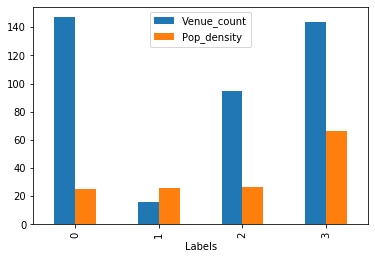

In [170]:
ax=neiggrouped.plot.bar(x='Labels',y=['Venue_count', 'Pop_density'])